In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
os.chdir("".join((os.getcwd().split("PCNN")[0], "/PCNN/src/")))
#import run_core as rc
#import utils_core as utc
import utils as utc
#import libs.pclib as pclib
#import sim_core as smc
import core.build.pclib as pclib
from game.envs import *
from game.constants import *


#import pcnn_core as pcr
from IPython.display import clear_output
from tqdm import tqdm
import time

%load_ext autoreload
%autoreload 2

#plt.style.use('classic')

logger = utc.setup_logger("M", level=1)
logger()

2025-02-17 20:51:22 | 


pygame 2.5.2 (SDL 2.28.3, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


### initial

In [3]:
N = 300

gcn = pclib.GridNetworkSq([
       pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.08, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.05, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.005, bounds=[-1, 1, -1, 1])])

space = pclib.PCNN(N=N,
                   Nj=len(gcn),
                   gain=10.,
                   offset=1.2,
                   clip_min=0.01,
                   threshold=0.4,
                   rep_threshold=0.9,
                   rec_threshold=4.,
                   num_neighbors=4,
                   xfilter=gcn,
                   name="2D")



# random walk
speed = 0.08
size = 20.

points = [[0., 0.]]

s = np.array([speed, speed])
x, y = points[0]
old_point = points[0]

tot = 50_000

# record
activity = np.zeros((N, tot))

for t in range(tot):
    
    x += s[0]
    y += s[1]

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    points += [[x, y]]
    if t % 500 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = speed * s / np.abs(s).sum()
        s = np.around(s, 3)

    activity[:, t] = space([points[-1][0]-old_point[0],
                         points[-1][1]-old_point[1]])[0]
    space.update()
    
    old_point = points[-1]

    if t % 100 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(4, 4))
        #plt.subplot(121)
        plt.plot(*np.array(points).T, 'k-', lw=0.3, alpha=0.3)
        
        plt.scatter(*np.array(space.get_position()).T, s=50, color="blue")
        plt.scatter(*np.array(space.get_centers()).T, s=50, color="blue", alpha=0.1)

        dist = np.around(np.linalg.norm((np.array(space.get_position())-np.array(points[-1]))), 2)
        plt.title(f"t={t}s N={len(space)} {dist=}")
        
        #plt.subplot(122)
        #plt.imshow(activity[:, t-500:t], cmap="plasma", aspect="auto")
        #plt.plot(range(len(activity)), len(activity) - activity*10, '-', color="white", lw=2)
        #plt.axis('off')
        
        plt.scatter(*points[-1], s=100, c='r')

        plt.xlim((-4, size+4))
        plt.ylim((-4, size+4))
        plt.pause(0.001)

AttributeError: module 'core.build.pclib' has no attribute 'PCNNsqv2'

In [18]:
_ = space([-p[0] + points[-1][0], -p[1] + points[-1][1]])

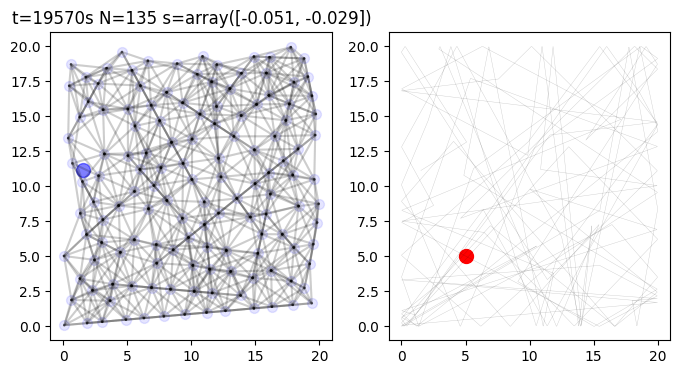

In [3]:
p = [5, 5]

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(*np.array(space.get_position()).T, s=100, color="blue", alpha=0.5)
plt.scatter(*np.array(space.get_centers()).T, s=50, color="blue", alpha=0.1)
#plt.scatter(*p, s=100, c='r')
for edge in space.make_edges():
    plt.plot((edge[0][0], edge[1][0]), (edge[0][1], edge[1][1]),
                                  alpha=0.1, color="black")


plt.xlim((-1, size+1))
plt.ylim((-1, size+1))
plt.title(f"t={t}s N={len(space)} {s=}")

plt.subplot(122)
plt.plot(*np.array(points).T, 'k-', lw=0.3, alpha=0.2)
plt.scatter(*p, s=100, c='r')
plt.xlim((-1, size+1))
plt.ylim((-1, size+1))
plt.show()

In [4]:
conn = space.get_connectivity()

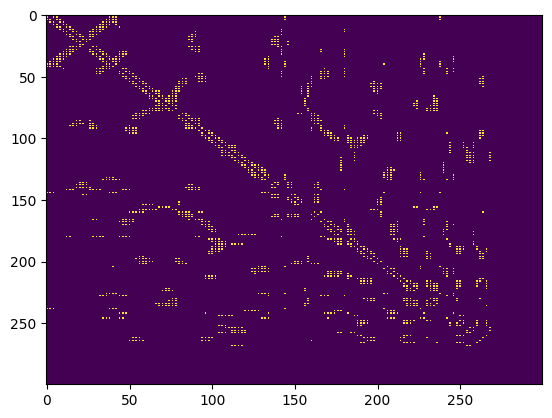

In [17]:
plt.imshow(conn, interpolation="nearest", aspect="auto");

In [12]:
conn[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## GC plot

In [51]:
N = 300

gc = pclib.GridLayerSq(sigma=0.04, speed=0.5, bounds=[-1, 1, -1, 1])

# random walk
speed = 0.08
size = 20.

points = [[0., 0.]]

s = np.array([speed, speed])
x, y = points[0]
old_point = points[0]

tot = 200_000

# record
activity = np.zeros((len(gc), tot))
plotting = False

for t in tqdm(range(tot)):
    
    x += s[0]
    y += s[1]

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    points += [[x, y]]
    if t % 500 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = speed * s / np.abs(s).sum()
        s = np.around(s, 3)

    activity[:, t] = gc([points[-1][0]-old_point[0],
                         points[-1][1]-old_point[1]])
    
    old_point = points[-1]

    if t % 100 == 0 and plotting:
        clear_output(wait=True)
        plt.figure(figsize=(4, 4))
        #plt.subplot(121)
        plt.plot(*np.array(points).T, 'k-', lw=0.3, alpha=0.3)
        
        #plt.scatter(*np.array(gc.get_positions()).T, s=50, color="blue")

        plt.title(f"{t=}")
        #plt.subplot(122)
        #plt.imshow(activity[:, t-500:t], cmap="plasma", aspect="auto")
        #plt.plot(range(len(activity)), len(activity) - activity*10, '-', color="white", lw=2)
        #plt.axis('off')
        
        plt.scatter(*points[-1], s=100, c='r')

        plt.xlim((-4, size+4))
        plt.ylim((-4, size+4))
        plt.pause(0.001)

logger()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 338055.94it/s]
2025-02-17 19:14:30 | 
2025-02-17 19:14:30 | 


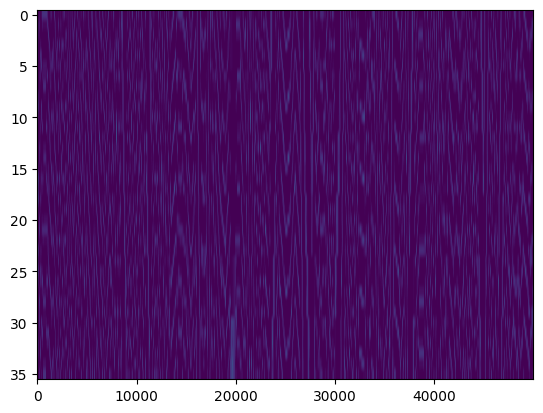

In [44]:
plt.imshow(activity[:, :], aspect="auto");

In [54]:
colrs = plt.cm.rainbow(len(activity))

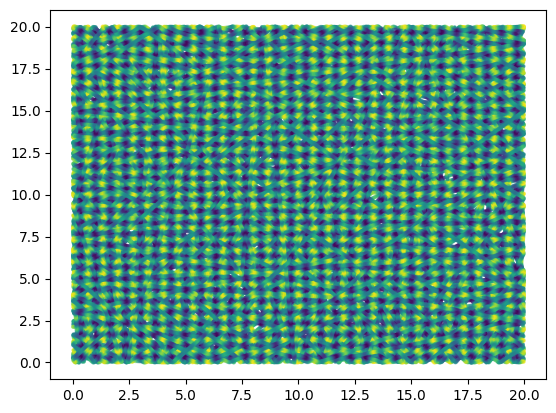

In [74]:
asum = activity[:, :].mean(axis=0)
plt.scatter(*np.array(points[1:]).T, c=asum, s=np.where(asum>0.02, 4, 0), alpha=0.5);


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 20.31it/s]


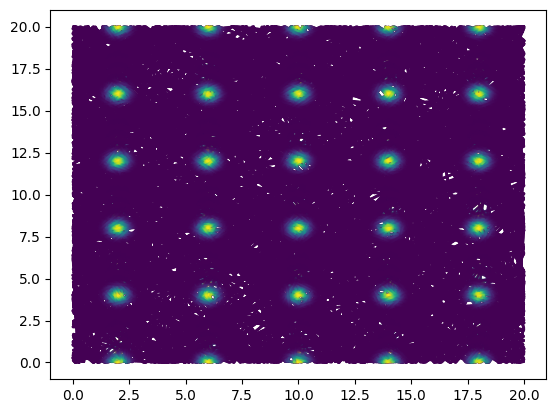

In [58]:

for i in tqdm(range(4)):
    plt.scatter(*np.array(points[1:]).T, c=activity[i, :], s=np.where(activity[-1, :]>0.1, 5, 1), alpha=0.5)

plt.show()

## hex

In [19]:

gc = pclib.GridLayerHex(sigma=0.04, speed=0.6)

# random walk
speed = 0.08
size = 20.

points = [[0., 0.]]

s = np.array([speed, speed])
x, y = points[0]
old_point = points[0]

tot = 200_000

# record
activity = np.zeros((len(gc), tot))
plotting = False

for t in tqdm(range(tot)):
    
    x += s[0]
    y += s[1]

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    points += [[x, y]]
    if t % 500 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = speed * s / np.abs(s).sum()
        s = np.around(s, 3)

    activity[:, t] = gc([points[-1][0]-old_point[0],
                         points[-1][1]-old_point[1]])
    
    old_point = points[-1]

    if t % 100 == 0 and plotting:
        clear_output(wait=True)
        plt.figure(figsize=(4, 4))
        #plt.subplot(121)
        plt.plot(*np.array(points).T, 'k-', lw=0.3, alpha=0.3)
        
        #plt.scatter(*np.array(gc.get_positions()).T, s=50, color="blue")

        plt.title(f"{t=}")
        #plt.subplot(122)
        #plt.imshow(activity[:, t-500:t], cmap="plasma", aspect="auto")
        #plt.plot(range(len(activity)), len(activity) - activity*10, '-', color="white", lw=2)
        #plt.axis('off')
        
        plt.scatter(*points[-1], s=100, c='r')

        plt.xlim((-4, size+4))
        plt.ylim((-4, size+4))
        plt.pause(0.001)

logger()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 394556.01it/s]
2025-02-17 20:55:41 | 


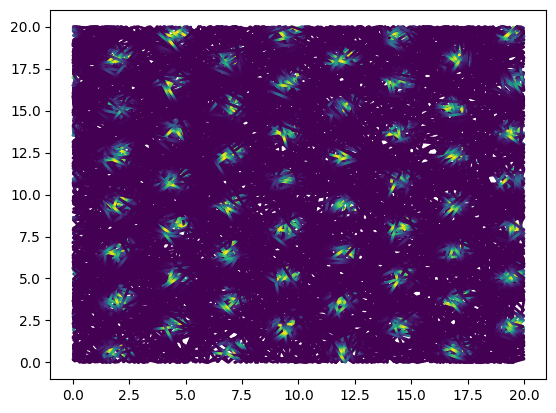

In [28]:
#asum = activity[:, :].mean(axis=0)
plt.scatter(*np.array(points[1:]).T, c=activity[0], s=1, alpha=1.)
plt.show()
